In [2]:
# Packages to locally download images to the notebook
import requests
import zipfile

# To find files
import glob

# Obtain a path to the ZIP file
r=requests.get('http://rpdata.caltech.edu/courses/course_data/ecoli_growth.zip')

# Write the ZIP file locally to the notebook
filename = "growth_data.zip"
with open(filename, mode="wb") as localfile:
  localfile.write(r.content)

# Extract images from the ZIP file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')
    
# List TRITC images
files = glob.glob('./ecoli_growth/*TRITC*')
files[0:5]

['./ecoli_growth/ecoli_TRITC_05.tif',
 './ecoli_growth/ecoli_TRITC_04.tif',
 './ecoli_growth/ecoli_TRITC_10.tif',
 './ecoli_growth/ecoli_TRITC_13.tif',
 './ecoli_growth/ecoli_TRITC_03.tif']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import for interactives
import panel as pn

# import for image processing 
import skimage.io

# For stylistic preferences
%config Inlinebackend.figure_format = 'retina'
pn.extension()
sns.set()

In [5]:
# Sort files
files = np.sort(files)
files[:5]

array(['./ecoli_growth/ecoli_TRITC_00.tif',
       './ecoli_growth/ecoli_TRITC_01.tif',
       './ecoli_growth/ecoli_TRITC_02.tif',
       './ecoli_growth/ecoli_TRITC_03.tif',
       './ecoli_growth/ecoli_TRITC_04.tif'], dtype='<U33')

/tmp/ipykernel_5630/1092888963.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


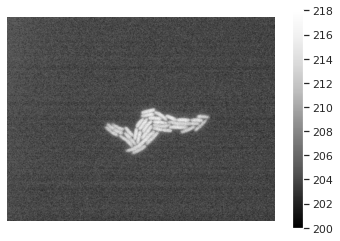

In [6]:
# Read in example image
img = skimage.io.imread(files[10])

# Show the example image
plt.imshow(img, cmap=plt.cm.Greys_r)
plt.grid(False)
plt.axis('off')
plt.colorbar();

/tmp/ipykernel_5630/701322168.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


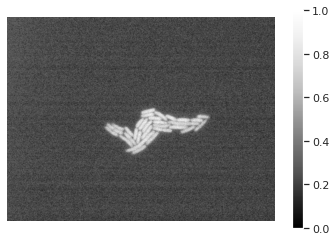

In [7]:
# Normalize image
img_norm = (img - img.min()) / (img.max()-img.min())

# Show the example image
plt.imshow(img_norm, cmap=plt.cm.Greys_r)
plt.grid(False)
plt.axis('off')
plt.colorbar(); 

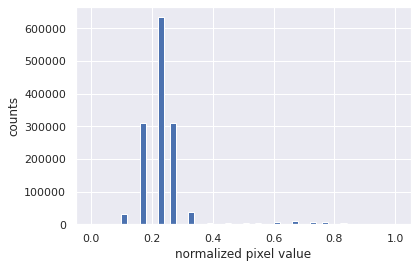

In [9]:
plt.hist(img_norm.flatten(), bins=50, range=(0, 1))
plt.xlabel('normalized pixel value')
plt.ylabel('counts');

/tmp/ipykernel_5630/4205281965.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


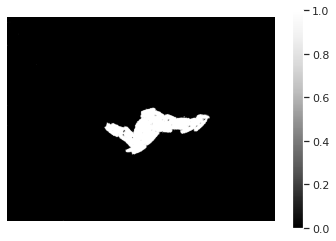

In [10]:
# Define threshold
threshold = 0.4

# Create binary image with threshold
img_threshold = (img_norm > threshold)

# Show the segmented image
plt.imshow(img_threshold, cmap=plt.cm.Greys_r)
plt.grid(False)
plt.axis('off')
plt.colorbar();

In [11]:
# Create array to save areas
area_array = np.zeros(len(files))
for i, file in enumerate(files):
  # Read the file
  img = skimage.io.imread(file)
  # Normalize the image
  img_norm = (img - img.min()) / (img.max()-img.min())
  # Apply threshold
  img_threshold = (img_norm > threshold)
  # Store area
  area_array[i] = np.sum(img_threshold)

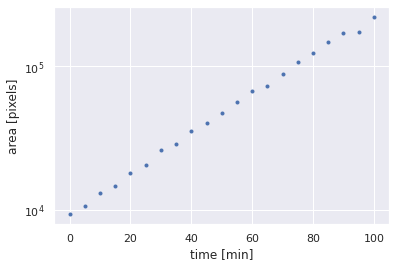

In [12]:
# plot area against time
dt = 5 # minutes

# Define array for measuring time
times = np.arange(len(files)) * dt

# plot time vs area
plt.plot(times, area_array, '.')
plt.yscale('log')
plt.xlabel('time [min]')
plt.ylabel('area [pixels]');

In [16]:
def err(areas, times, growth_rate):
    # Compute the theoritical area
    area_theory = areas[0] * np.exp(growth_rate * times)
    
    # Compute sum of squared residuals
    r_square = np.sum((areas - area_theory)**2)
    return r_square

In [17]:
k_array = np.linspace(0.02, 0.05, 200)

# Initialize array to save sum of residuals
residuals = np.zeros(len(k_array))

for i, k in enumerate(k_array):
    residuals[i] = err(area_array, times, k)

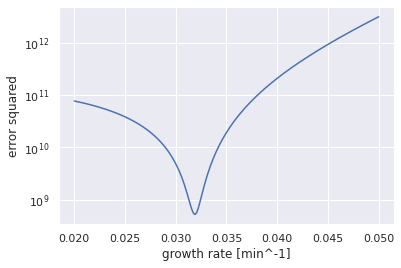

In [18]:
plt.plot(k_array, residuals)
plt.yscale('log')
plt.xlabel('growth rate [min^-1]')
plt.ylabel('error squared');

In [21]:
# find index for the smallest k
k_opt = k_array[np.argmin(residuals)]
print(f'The optimal growth rate k = {k_opt:.3f}')

The optimal growth rate k = 0.032


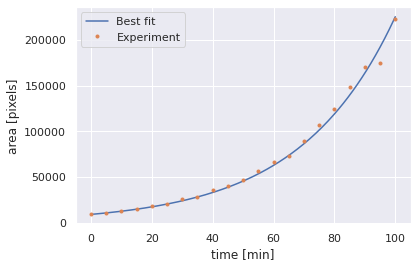

In [24]:
# Define the time array for smooth plot
time_array = np.linspace(0, times.max(), 200)

# Compute the best fit curve
area_model = area_array[0] * np.exp(k_opt * time_array)

# Plot theory curve
plt.plot(time_array, area_model, label='Best fit')

# Plot numerical curve
plt.plot(times, area_array, '.', label='Experiment')

plt.ylabel('area [pixels]')
plt.xlabel('time [min]')
plt.legend()                                    